In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import Counter
from sklearn import metrics 
%matplotlib inline

### prepare the data 

In [3]:
df=pd.read_csv("./heart.csv")
df.drop_duplicates(inplace=True)


In [4]:
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [5]:
#test if the data is splitted correctly
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 113, 1: 128})

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
logosticregression=LogisticRegression(max_iter=3000)
logosticregression.fit(X_train,y_train)
print(logosticregression.predict(X_test[0].reshape(1,-1)))

[1]


In [21]:
print(X_test[0])

[ 1.15977497 -1.47344923  1.08921689  1.41948723  0.43529641 -0.42587856
  0.82475429 -0.06981134 -0.70490738 -0.23330193  1.00680272 -0.71705504
 -0.57005513]


In [25]:
print(logosticregression.predict(X_test))
logosticregression.predict(np.array(X_test[0]).reshape(1, -1))[0]


[1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1]


1

In [9]:
score=logosticregression.score(X_test,y_test)
print(score)

0.8360655737704918


In [10]:
prediction=logosticregression.predict(X_test)
cm=metrics.confusion_matrix(y_test,prediction)
print(cm)

[[20  5]
 [ 5 31]]


Text(0.5, 1.0, 'actual score:0.8360655737704918')

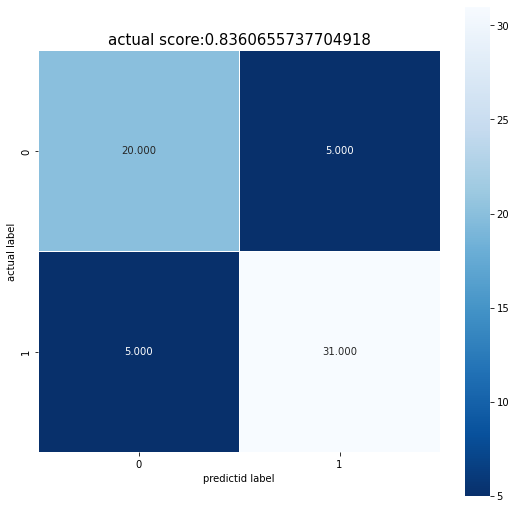

In [11]:
plt.figure(figsize=(9,9));
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=0.5,square=True,cmap="Blues_r")
plt.ylabel("actual label")
plt.xlabel("predictid label")
all_sample_title="actual score:{0}".format(score)
plt.title(all_sample_title,size=15)

In [12]:
import pickle
pickle.dump(logosticregression,open("model.pkl","wb"))


In [30]:
model=pickle.load(open("model.pkl","rb"))
print(model.predict(np.array(X_test[0]).reshape(1, -1))[0])

1
